In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import warnings
import pywt
import tensorflow as tf
import keras
import sklearn
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Bidirectional
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import skew, kurtosis

In [2]:
dirA="./Datasets/setA/"
tempA=[]
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempA = sorted(tempA)

dirB="./Datasets/setB/"
tempB=[]
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)

dirC="./Datasets/setC/"
tempC=[]
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)

dirD="./Datasets/setD/"
tempD=[]
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)

dirE="./Datasets/setE/"
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_table(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_table(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_table(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [4]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [5]:
bigA=table(ta)
bigB=table(tb)
bigC=table(tc)
bigD=table(td)
bigE=table(te)

head=list(bigA.columns.values)

In [6]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [7]:
matA = creat_mat(bigA)
matB = creat_mat(bigB)
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE) 

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB)
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

In [8]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(26,16),dpi=600)
plt.subplot(5,1,1)
plt.title('Set A')
plt.plot(samples,matA[:,0],label='Normal',color='green')
plt.subplot(5,1,2)
plt.title('Set B')
plt.plot(samples,matB[:,0],label='Normal',color='green')
plt.subplot(5,1,3)
plt.title('Set C')
plt.plot(samples,matC[:,0],label='Inter-ictal',color='blue')
plt.subplot(5,1,4)
plt.title('Set D')
plt.plot(samples,matD[:,0],label='Inter-ictal',color='blue')
plt.subplot(5,1,5)
plt.title('Set E')
plt.plot(samples,matE[:,0],label='Seizure',color='red')
plt.show()

In [9]:
matA_out = np.zeros((1,100))
X_data_A = np.concatenate((matA,matA_out), axis = 0) 
print(X_data_A.shape)

(4098, 100)


In [10]:
matB_out = np.ones((1,100))
X_data_B = np.concatenate((matB,matB_out), axis = 0) 
print(X_data_B.shape)

(4098, 100)


In [11]:
matC_out = np.full((1,100),[2])
X_data_C = np.concatenate((matC,matC_out), axis = 0) 
print(X_data_C.shape)

(4098, 100)


In [12]:
matD_out = np.full((1,100),[3])
X_data_D = np.concatenate((matD,matD_out), axis = 0) 
print(X_data_D.shape)

(4098, 100)


In [13]:
matE_out = np.full((1,100),[4])
X_data_E = np.concatenate((matE,matE_out), axis = 0) 
print(X_data_E.shape)

(4098, 100)


In [14]:
data = np.concatenate((X_data_A,X_data_B,X_data_C,X_data_D,X_data_E), axis =1)
data = data.T
c = 'A'
col = []
sig = []
for i in range(np.size(data,1)-1):
    col.append(st+str(i))
for i in range(np.size(data,0)):
    sig.append('S'+str(i))
col.append('out')
TotalData = pd.DataFrame(data, columns=col, index= sig)

In [15]:
TotalData

A0     A1     A2     A3     A4     A5     A6     A7     A8     A9   
S0     12.0   22.0   35.0   45.0   69.0   74.0   79.0   78.0   66.0   43.0  \
S1    -56.0  -50.0  -64.0  -91.0 -135.0 -140.0 -134.0 -114.0 -115.0 -126.0   
S2    -37.0  -22.0  -17.0  -24.0  -31.0  -20.0   -5.0   14.0   31.0   31.0   
S3    -31.0  -43.0  -39.0  -39.0   -9.0   -5.0   18.0    7.0  -12.0  -42.0   
S4     14.0   26.0   32.0   25.0   16.0    8.0    8.0   12.0   11.0   19.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
S495  -40.0  -58.0  -75.0  -88.0  -89.0  -81.0  -67.0  -52.0  -28.0   14.0   
S496  187.0   44.0 -147.0 -368.0 -550.0 -657.0 -665.0 -581.0 -442.0 -290.0   
S497 -438.0 -561.0 -622.0 -581.0 -460.0 -295.0 -164.0  -70.0    3.0   66.0   
S498 -476.0 -518.0 -521.0 -362.0  -68.0  175.0  289.0  184.0   15.0 -130.0   
S499   23.0  144.0  228.0  260.0  255.0  218.0  178.0  126.0   60.0    6.0   

      ...  A4088  A4089  A4090  A4091  A4092  A4093  A4094  A4095  A4096  out  
S0    ...  -28.0  -21.0  -14.0  -14.0  -25.0  -28.0  -11.0    8.0   77.0  0.0  
S1    ...  -82.0 -114.0 -138.0 -159.0 -172.0 -180.0 -173.0 -162.0  -82.0  0.0  
S2    ...  -52.0  -23.0  -14.0   -5.0   -3.0    7.0    3.0    4.0   82.0  0.0  
S3    ...  -32.0  -40.0  -23.0   -1.0   11.0   12.0   -6.0   10.0   33.0  0.0  
S4    ...  -19.0  -29.0  -35.0  -51.0  -55.0  -58.0  -32.0   -6.0  -17.0  0.0  
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...  
S495  ...   32.0   32.0   18.0    6.0   -3.0  -10.0  -13.0  -16.0 -151.0  4.0  
S496  ...  510.0  562.0  607.0  667.0  748.0  763.0  703.0  446.0 -537.0  4.0  
S497  ...  443.0  399.0  319.0  196.0   40.0  -47.0 -118.0 -163.0  -56.0  4.0  
S498  ... -261.0 -248.0 -147.0   36.0  224.0  299.0  246.0  556.0  276.0  4.0  
S499  ... -127.0 -123.0 -152.0 -231.0 -272.0 -272.0 -155.0    6.0 -221.0  4.0  

[500 rows x 4098 columns]

In [16]:
df = TotalData.drop(['out'], axis =1)
target = TotalData['out']

In [17]:
final_values = []

In [18]:
filters = pywt.wavelist()
print(filters)
print(len(filters))
level =5
w_name = 'bior6.8'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [19]:
w = pywt.Wavelet(w_name)
temp_cA_A  = []
temp_cD5_A = []
temp_cD4_A = []
temp_cD3_A = []
temp_cD2_A = []
temp_cD1_A = []
for i in matA.T:
  cA_A,cD5_A,cD4_A,cD3_A,cD2_A,cD1_A = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_A.append(cA_A)
  temp_cD1_A.append(cD1_A)
  temp_cD2_A.append(cD2_A)
  temp_cD3_A.append(cD3_A)
  temp_cD4_A.append(cD4_A)
  temp_cD5_A.append(cD5_A)
coeff_cA_A  = np.array(temp_cA_A)
coeff_cD1_A = np.array(temp_cD1_A)
coeff_cD2_A = np.array(temp_cD2_A)
coeff_cD3_A = np.array(temp_cD3_A)
coeff_cD4_A = np.array(temp_cD4_A)
coeff_cD5_A = np.array(temp_cD5_A)

In [20]:
w = pywt.Wavelet(w_name)
temp_cA_B  = []
temp_cD5_B = []
temp_cD4_B = []
temp_cD3_B = []
temp_cD2_B = []
temp_cD1_B = []
for i in matB.T:
  cA_B,cD5_B,cD4_B,cD3_B,cD2_B,cD1_B = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_B.append(cA_B)
  temp_cD1_B.append(cD1_B)
  temp_cD2_B.append(cD2_B)
  temp_cD3_B.append(cD3_B)
  temp_cD4_B.append(cD4_B)
  temp_cD5_B.append(cD5_B)
coeff_cA_B  = np.array(temp_cA_B)
coeff_cD1_B = np.array(temp_cD1_B)
coeff_cD2_B = np.array(temp_cD2_B)
coeff_cD3_B = np.array(temp_cD3_B)
coeff_cD4_B = np.array(temp_cD4_B)
coeff_cD5_B = np.array(temp_cD5_B)

In [21]:
w = pywt.Wavelet(w_name)
temp_cA_C  = []
temp_cD5_C = []
temp_cD4_C = []
temp_cD3_C = []
temp_cD2_C = []
temp_cD1_C = []
for i in matC.T:
  cA_C,cD5_C,cD4_C,cD3_C,cD2_C,cD1_C = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_C.append(cA_C)
  temp_cD1_C.append(cD1_C)
  temp_cD2_C.append(cD2_C)
  temp_cD3_C.append(cD3_C)
  temp_cD4_C.append(cD4_C)
  temp_cD5_C.append(cD5_C)
coeff_cA_C  = np.array(temp_cA_C)
coeff_cD1_C = np.array(temp_cD1_C)
coeff_cD2_C = np.array(temp_cD2_C)
coeff_cD3_C = np.array(temp_cD3_C)
coeff_cD4_C = np.array(temp_cD4_C)
coeff_cD5_C = np.array(temp_cD5_C)

In [22]:
w = pywt.Wavelet(w_name)
temp_cA_D  = []
temp_cD5_D = []
temp_cD4_D = []
temp_cD3_D = []
temp_cD2_D = []
temp_cD1_D = []
for i in matD.T:
  cA_D,cD5_D,cD4_D,cD3_D,cD2_D,cD1_D = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_D.append(cA_D)
  temp_cD1_D.append(cD1_D)
  temp_cD2_D.append(cD2_D)
  temp_cD3_D.append(cD3_D)
  temp_cD4_D.append(cD4_D)
  temp_cD5_D.append(cD5_D)
coeff_cA_D  = np.array(temp_cA_D)
coeff_cD1_D = np.array(temp_cD1_D)
coeff_cD2_D = np.array(temp_cD2_D)
coeff_cD3_D = np.array(temp_cD3_D)
coeff_cD4_D = np.array(temp_cD4_D)
coeff_cD5_D = np.array(temp_cD5_D)

In [23]:
w = pywt.Wavelet(w_name)
temp_cA_E  = []
temp_cD5_E = []
temp_cD4_E = []
temp_cD3_E = []
temp_cD2_E = []
temp_cD1_E = []
for i in matE.T:
  cA_E,cD5_E,cD4_E,cD3_E,cD2_E,cD1_E = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_E.append(cA_E)
  temp_cD1_E.append(cD1_E)
  temp_cD2_E.append(cD2_E)
  temp_cD3_E.append(cD3_E)
  temp_cD4_E.append(cD4_E)
  temp_cD5_E.append(cD5_E)
coeff_cA_E  = np.array(temp_cA_E)
coeff_cD1_E = np.array(temp_cD1_E)
coeff_cD2_E = np.array(temp_cD2_E)
coeff_cD3_E = np.array(temp_cD3_E)
coeff_cD4_E = np.array(temp_cD4_E)
coeff_cD5_E = np.array(temp_cD5_E)

In [24]:
#SET A
print(coeff_cA_A.shape)
print(coeff_cD5_A.shape)
print(coeff_cD4_A.shape)
print(coeff_cD3_A.shape)
print(coeff_cD2_A.shape)
print(coeff_cD1_A.shape)

#SET B
print(coeff_cA_B.shape)
print(coeff_cD5_B.shape)
print(coeff_cD4_B.shape)
print(coeff_cD3_B.shape)
print(coeff_cD2_B.shape)
print(coeff_cD1_B.shape)

#SET C
print(coeff_cA_C.shape)
print(coeff_cD5_C.shape)
print(coeff_cD4_C.shape)
print(coeff_cD3_C.shape)
print(coeff_cD2_C.shape)
print(coeff_cD1_C.shape)

#SET D
print(coeff_cA_D.shape)
print(coeff_cD5_D.shape)
print(coeff_cD4_D.shape)
print(coeff_cD3_D.shape)
print(coeff_cD2_D.shape)
print(coeff_cD1_D.shape)

#SET E
print(coeff_cA_E.shape)
print(coeff_cD5_E.shape)
print(coeff_cD4_E.shape)
print(coeff_cD3_E.shape)
print(coeff_cD2_E.shape)
print(coeff_cD1_E.shape)

(100, 144)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)
(100, 144)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)
(100, 144)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)
(100, 144)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)
(100, 144)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)


In [25]:
coeff_cA_total = np.concatenate([coeff_cA_A,coeff_cA_B,coeff_cA_C,coeff_cA_D,coeff_cA_E])
coeff_cD1_total = np.concatenate([coeff_cD1_A,coeff_cD1_B,coeff_cD1_C,coeff_cD1_D,coeff_cD1_E])
coeff_cD2_total = np.concatenate([coeff_cD2_A,coeff_cD2_B,coeff_cD2_C,coeff_cD2_D,coeff_cD2_E])
coeff_cD3_total = np.concatenate([coeff_cD3_A,coeff_cD3_B,coeff_cD3_C,coeff_cD3_D,coeff_cD3_E])
coeff_cD4_total = np.concatenate([coeff_cD4_A,coeff_cD4_B,coeff_cD4_C,coeff_cD4_D,coeff_cD4_E])
coeff_cD5_total = np.concatenate([coeff_cD5_A,coeff_cD5_B,coeff_cD5_C,coeff_cD5_D,coeff_cD5_E])

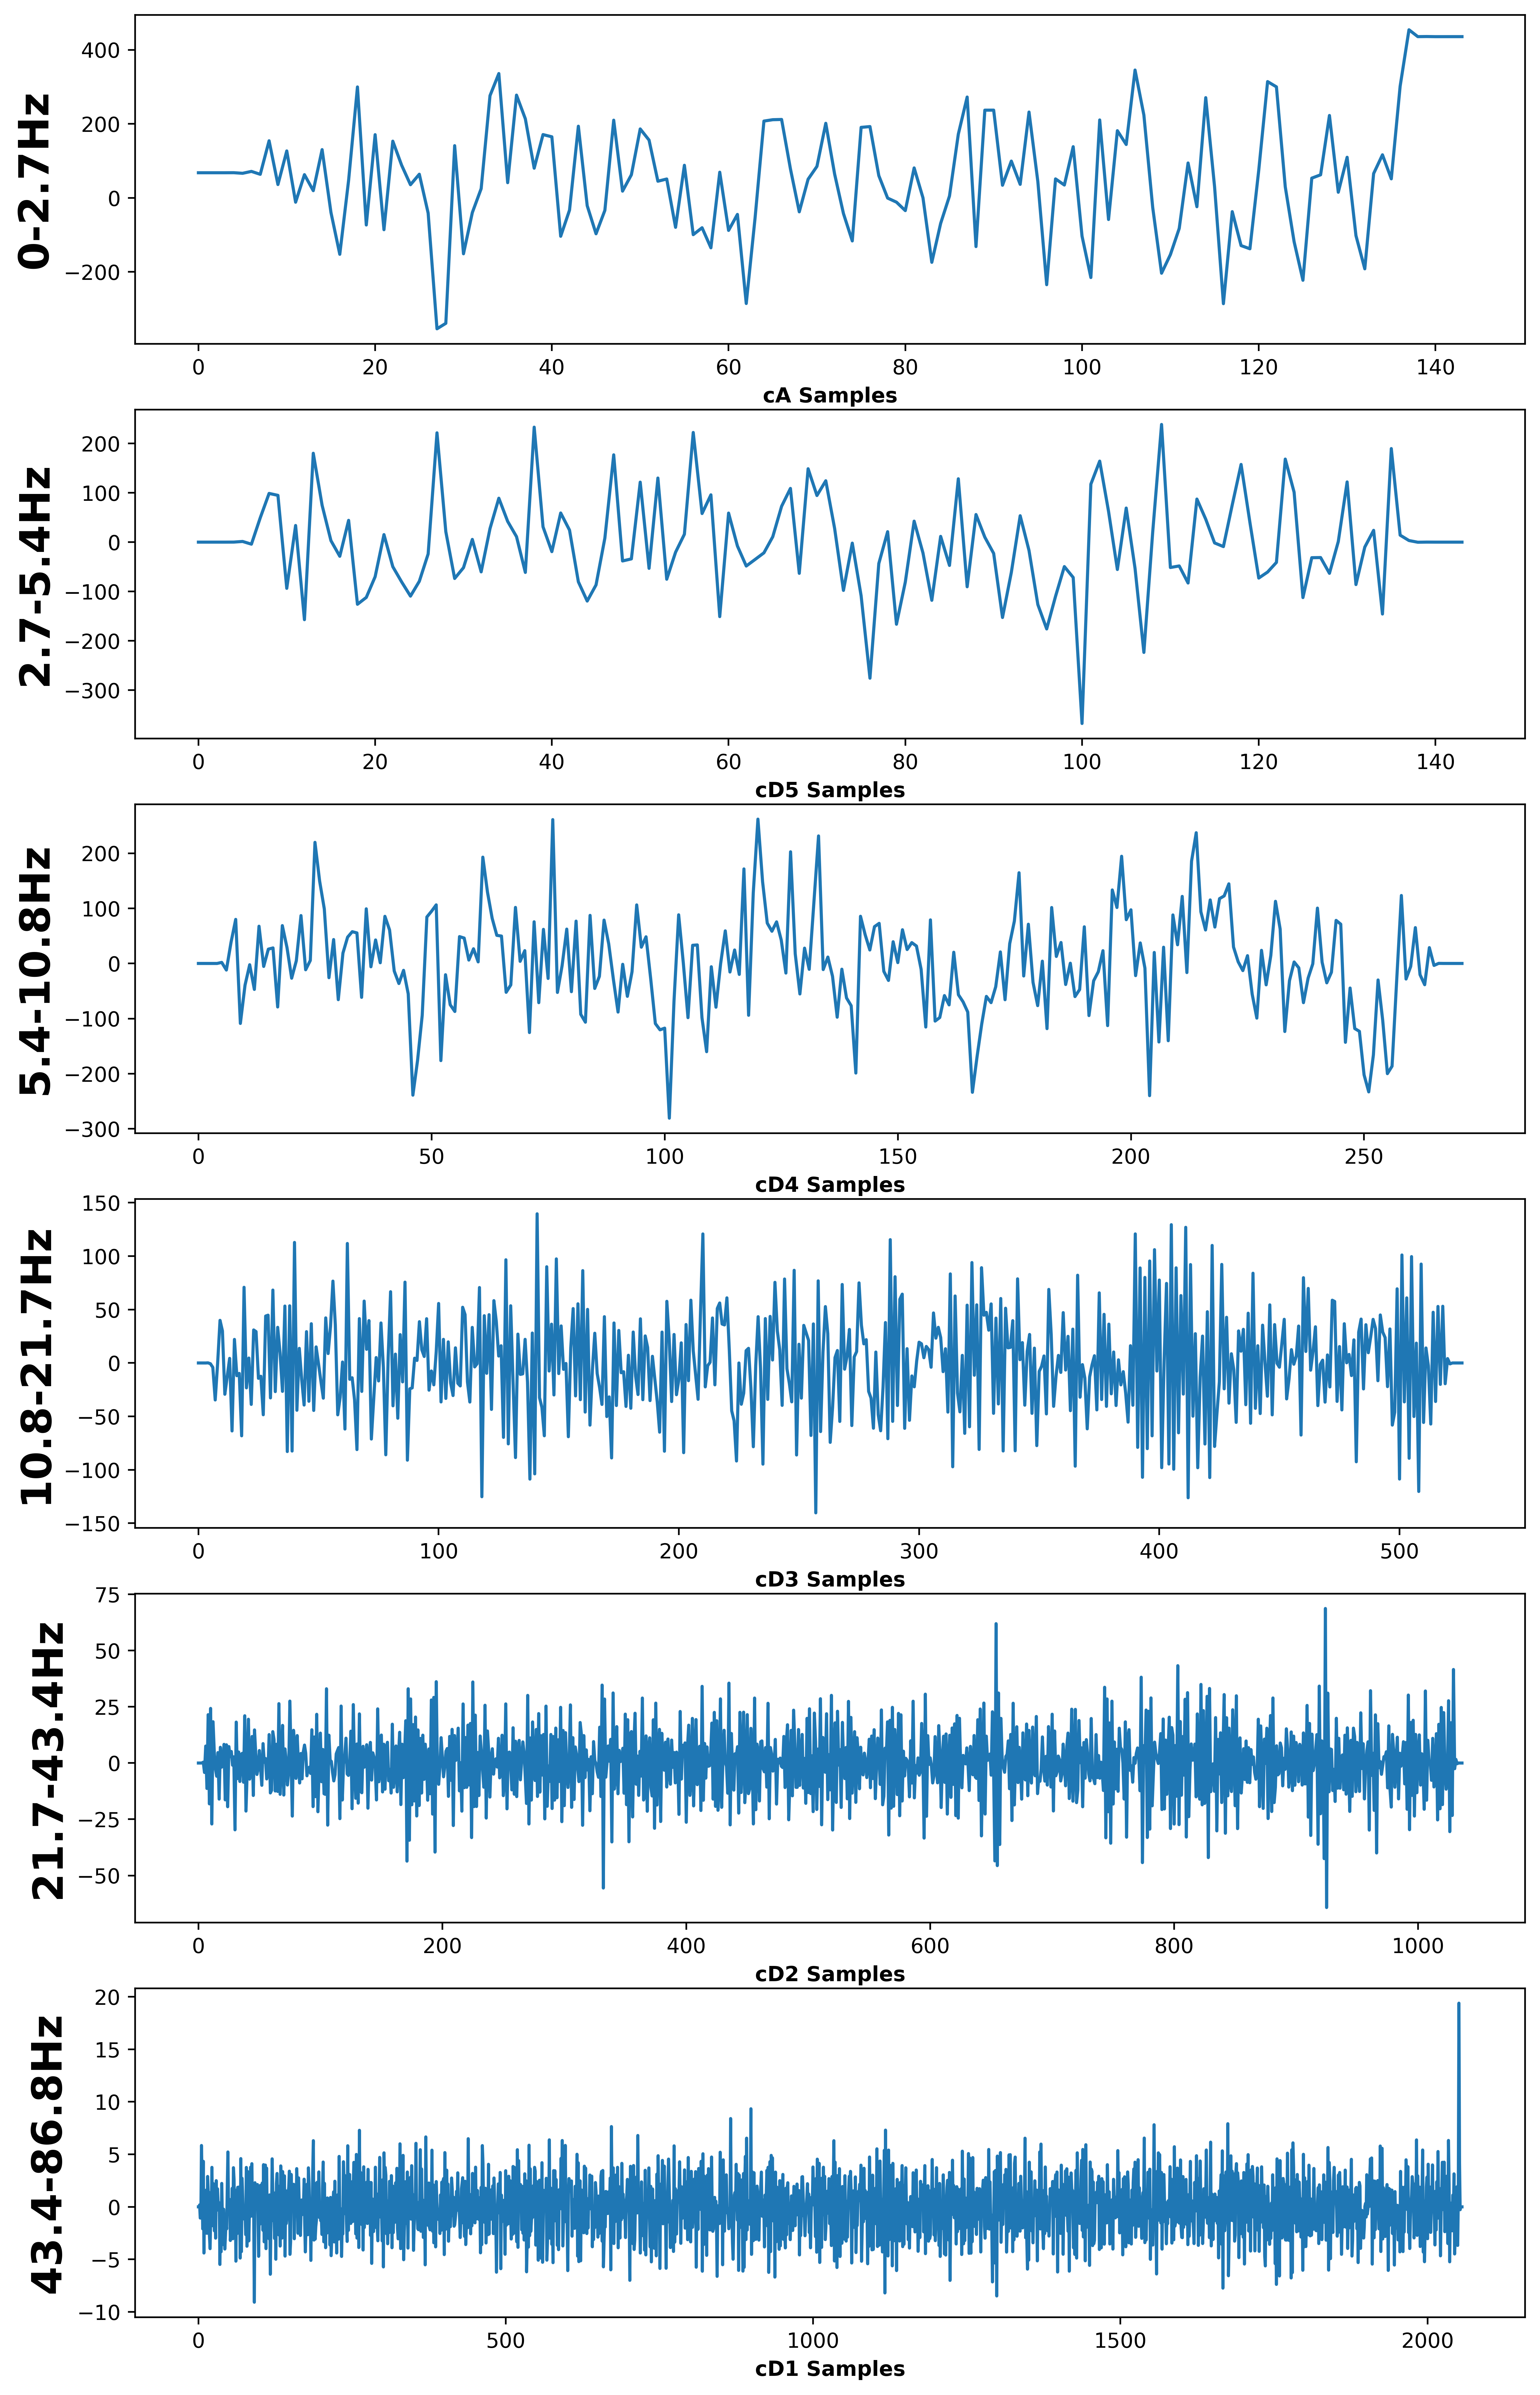

In [26]:
plt.figure(figsize=(12,20),dpi=500)
plt.subplot(level+1,1,1)
plt.ylabel('0-2.7Hz', size=20,weight='bold')
plt.xlabel('cA Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cA_total[0]),1),coeff_cA_total[0,:].T)

plt.subplot(level+1,1,2)
plt.ylabel('2.7-5.4Hz', size=20,weight='bold')
plt.xlabel('cD5 Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cD5_total[0]),1),coeff_cD5_total[0,:].T)

plt.subplot(level+1,1,3)
plt.ylabel('5.4-10.8Hz', size=20,weight='bold')
plt.xlabel('cD4 Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cD4_total[0]),1),coeff_cD4_total[0,:].T)

plt.subplot(level+1,1,4)
plt.ylabel('10.8-21.7Hz', size=20,weight='bold')
plt.xlabel('cD3 Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cD3_total[0]),1),coeff_cD3_total[0,:].T)

plt.subplot(level+1,1,5)
plt.ylabel('21.7-43.4Hz', size=20,weight='bold')
plt.xlabel('cD2 Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cD2_total[0]),1),coeff_cD2_total[0,:].T)

plt.subplot(level+1,1,6)
plt.ylabel('43.4-86.8Hz', size=20,weight='bold')
plt.xlabel('cD1 Samples', size=10,weight='bold')
plt.plot(np.arange(0,len(coeff_cD1_total[0]),1),coeff_cD1_total[0,:].T)


plt.show()

In [27]:
feature_size = 4
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [28]:
def build_features(mat):
    lis = list()
    lis = lis + [kurtosis(mat)] #scientific feature
    lis = lis + [np.var(mat)]     
    lis = lis + [skew(mat)]     #scientific feature
    lis = lis + [np.std(mat)]
    sleep(0.01)
             
    return lis

In [29]:
# create features of class I and cA
f1_cA_A    = np.zeros((100,1))
f2_cA_A    = np.zeros((100,1))
f3_cA_A    = np.zeros((100,1))
f4_cA_A    = np.zeros((100,1))

for i in range(100):
    [f1_cA_A[i,0],f2_cA_A[i,0],f3_cA_A[i,0],f4_cA_A[i,0]]=build_features(coeff_cA_A.T[:,i])

# # create features of class I and cD1
# f1_cD1_A    = np.zeros((100,1))
# f2_cD1_A    = np.zeros((100,1))
# f3_cD1_A    = np.zeros((100,1))
# f4_cD1_A    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_A[i,0],f2_cD1_A[i,0],f3_cD1_A[i,0],f4_cD1_A[i,0]]=build_features(coeff_cD1_A.T[:,i])
  
# create features of class I and cD1
f1_cD2_A   = np.zeros((100,1))
f2_cD2_A   = np.zeros((100,1))
f3_cD2_A   = np.zeros((100,1))
f4_cD2_A   = np.zeros((100,1))

for i in range(100):
    [f1_cD2_A[i,0],f2_cD2_A[i,0],f3_cD2_A[i,0],f4_cD2_A[i,0]]=build_features(coeff_cD2_A.T[:,i])

# create features of class I and cD3
f1_cD3_A   = np.zeros((100,1))
f2_cD3_A   = np.zeros((100,1))
f3_cD3_A   = np.zeros((100,1))
f4_cD3_A   = np.zeros((100,1))

for i in range(100):
    [f1_cD3_A[i,0],f2_cD3_A[i,0],f3_cD3_A[i,0],f4_cD3_A[i,0]]=build_features(coeff_cD3_A.T[:,i])

# create features of class I and cD4
f1_cD4_A   = np.zeros((100,1))
f2_cD4_A   = np.zeros((100,1))
f3_cD4_A   = np.zeros((100,1))
f4_cD4_A   = np.zeros((100,1))

for i in range(100):
    [f1_cD4_A[i,0],f2_cD4_A[i,0],f3_cD4_A[i,0],f4_cD4_A[i,0]]=build_features(coeff_cD4_A.T[:,i])
    
# create features of class I and cD5
f1_cD5_A   = np.zeros((100,1))
f2_cD5_A   = np.zeros((100,1))
f3_cD5_A   = np.zeros((100,1))
f4_cD5_A   = np.zeros((100,1))

for i in range(100):
    [f1_cD5_A[i,0],f2_cD5_A[i,0],f3_cD5_A[i,0],f4_cD5_A[i,0]]=build_features(coeff_cD5_A.T[:,i])

In [30]:
# create features of class II (INTERICTAL and cA)
f1_cA_B    = np.zeros((100,1))
f2_cA_B    = np.zeros((100,1))
f3_cA_B    = np.zeros((100,1))
f4_cA_B    = np.zeros((100,1))

for i in range(100):
    [f1_cA_B[i,0],f2_cA_B[i,0],f3_cA_B[i,0],f4_cA_B[i,0]]=build_features(coeff_cA_B.T[:,i])

# # create features of class II (INTERICTAL and cD1)
# f1_cD1_B    = np.zeros((100,1))
# f2_cD1_B    = np.zeros((100,1))
# f3_cD1_B    = np.zeros((100,1))
# f4_cD1_B    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_B[i,0],f2_cD1_B[i,0],f3_cD1_B[i,0],f4_cD1_B[i,0]]=build_features(coeff_cD1_B.T[:,i])

# create features of class II (INTERICTAL and cD2)
f1_cD2_B    = np.zeros((100,1))
f2_cD2_B    = np.zeros((100,1))
f3_cD2_B    = np.zeros((100,1))
f4_cD2_B    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_B[i,0],f2_cD2_B[i,0],f3_cD2_B[i,0],f4_cD2_B[i,0]]=build_features(coeff_cD2_B.T[:,i])
    
# create features of class II (INTERICTAL and cD3)
f1_cD3_B    = np.zeros((100,1))
f2_cD3_B    = np.zeros((100,1))
f3_cD3_B    = np.zeros((100,1))
f4_cD3_B    = np.zeros((100,1))


for i in range(100):
    [f1_cD3_B[i,0],f2_cD3_B[i,0],f3_cD3_B[i,0],f4_cD3_B[i,0]]=build_features(coeff_cD3_B.T[:,i])
    

# create features of class II (INTERICTAL and cD4)
f1_cD4_B    = np.zeros((100,1))
f2_cD4_B    = np.zeros((100,1))
f3_cD4_B    = np.zeros((100,1))
f4_cD4_B    = np.zeros((100,1))

for i in range(100):
    [f1_cD4_B[i,0],f2_cD4_B[i,0],f3_cD4_B[i,0],f4_cD4_B[i,0]]=build_features(coeff_cD4_B.T[:,i])

# create features of class II (INTERICTAL and cD5)
f1_cD5_B    = np.zeros((100,1))
f2_cD5_B    = np.zeros((100,1))
f3_cD5_B    = np.zeros((100,1))
f4_cD5_B    = np.zeros((100,1))

for i in range(100):
    [f1_cD5_B[i,0],f2_cD5_B[i,0],f3_cD5_B[i,0],f4_cD5_B[i,0]]=build_features(coeff_cD5_B.T[:,i])

In [31]:
# create features of class II (INTERICTAL and cA)
f1_cA_C    = np.zeros((100,1))
f2_cA_C    = np.zeros((100,1))
f3_cA_C    = np.zeros((100,1))
f4_cA_C    = np.zeros((100,1))

for i in range(100):
    [f1_cA_C[i,0],f2_cA_C[i,0],f3_cA_C[i,0],f4_cA_C[i,0]]=build_features(coeff_cA_C.T[:,i])

# # create features of class II (INTERICTAL and cD1)
# f1_cD1_C    = np.zeros((100,1))
# f2_cD1_C    = np.zeros((100,1))
# f3_cD1_C    = np.zeros((100,1))
# f4_cD1_C    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_C[i,0],f2_cD1_C[i,0],f3_cD1_C[i,0],f4_cD1_C[i,0]]=build_features(coeff_cD1_C.T[:,i])

# create features of class II (INTERICTAL and cD2)
f1_cD2_C    = np.zeros((100,1))
f2_cD2_C    = np.zeros((100,1))
f3_cD2_C    = np.zeros((100,1))
f4_cD2_C    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_C[i,0],f2_cD2_C[i,0],f3_cD2_C[i,0],f4_cD2_C[i,0]]=build_features(coeff_cD2_C.T[:,i])
    
# create features of class II (INTERICTAL and cD3)
f1_cD3_C    = np.zeros((100,1))
f2_cD3_C    = np.zeros((100,1))
f3_cD3_C    = np.zeros((100,1))
f4_cD3_C    = np.zeros((100,1))


for i in range(100):
    [f1_cD3_C[i,0],f2_cD3_C[i,0],f3_cD3_C[i,0],f4_cD3_C[i,0]]=build_features(coeff_cD3_C.T[:,i])
    

# create features of class II (INTERICTAL and cD4)
f1_cD4_C    = np.zeros((100,1))
f2_cD4_C    = np.zeros((100,1))
f3_cD4_C    = np.zeros((100,1))
f4_cD4_C    = np.zeros((100,1))

for i in range(100):
    [f1_cD4_C[i,0],f2_cD4_C[i,0],f3_cD4_C[i,0],f4_cD4_C[i,0]]=build_features(coeff_cD4_C.T[:,i])

# create features of class II (INTERICTAL and cD5)
f1_cD5_C    = np.zeros((100,1))
f2_cD5_C    = np.zeros((100,1))
f3_cD5_C    = np.zeros((100,1))
f4_cD5_C    = np.zeros((100,1))

for i in range(100):
    [f1_cD5_C[i,0],f2_cD5_C[i,0],f3_cD5_C[i,0],f4_cD5_C[i,0]]=build_features(coeff_cD5_C.T[:,i])

In [32]:
# create features of class II (INTERICTAL and cA)
f1_cA_D    = np.zeros((100,1))
f2_cA_D    = np.zeros((100,1))
f3_cA_D    = np.zeros((100,1))
f4_cA_D    = np.zeros((100,1))

for i in range(100):
    [f1_cA_D[i,0],f2_cA_D[i,0],f3_cA_D[i,0],f4_cA_D[i,0]]=build_features(coeff_cA_D.T[:,i])

# # create features of class II (INTERICTAL and cD1)
# f1_cD1_D    = np.zeros((100,1))
# f2_cD1_D    = np.zeros((100,1))
# f3_cD1_D    = np.zeros((100,1))
# f4_cD1_D    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_D[i,0],f2_cD1_D[i,0],f3_cD1_D[i,0],f4_cD1_D[i,0]]=build_features(coeff_cD1_D.T[:,i])

# create features of class II (INTERICTAL and cD2)
f1_cD2_D    = np.zeros((100,1))
f2_cD2_D    = np.zeros((100,1))
f3_cD2_D    = np.zeros((100,1))
f4_cD2_D    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_D[i,0],f2_cD2_D[i,0],f3_cD2_D[i,0],f4_cD2_D[i,0]]=build_features(coeff_cD2_D.T[:,i])
    
# create features of class II (INTERICTAL and cD3)
f1_cD3_D    = np.zeros((100,1))
f2_cD3_D    = np.zeros((100,1))
f3_cD3_D    = np.zeros((100,1))
f4_cD3_D    = np.zeros((100,1))


for i in range(100):
    [f1_cD3_D[i,0],f2_cD3_D[i,0],f3_cD3_D[i,0],f4_cD3_D[i,0]]=build_features(coeff_cD3_D.T[:,i])
    

# create features of class II (INTERICTAL and cD4)
f1_cD4_D    = np.zeros((100,1))
f2_cD4_D    = np.zeros((100,1))
f3_cD4_D    = np.zeros((100,1))
f4_cD4_D    = np.zeros((100,1))

for i in range(100):
    [f1_cD4_D[i,0],f2_cD4_D[i,0],f3_cD4_D[i,0],f4_cD4_D[i,0]]=build_features(coeff_cD4_D.T[:,i])

# create features of class II (INTERICTAL and cD5)
f1_cD5_D    = np.zeros((100,1))
f2_cD5_D    = np.zeros((100,1))
f3_cD5_D    = np.zeros((100,1))
f4_cD5_D    = np.zeros((100,1))

for i in range(100):
    [f1_cD5_D[i,0],f2_cD5_D[i,0],f3_cD5_D[i,0],f4_cD5_D[i,0]]=build_features(coeff_cD5_D.T[:,i])

In [33]:
# create features of class III (SEIZURE and cA)
f1_cA_E    = np.zeros((100,1))
f2_cA_E    = np.zeros((100,1))
f3_cA_E    = np.zeros((100,1))
f4_cA_E    = np.zeros((100,1))

for i in range(100):
    [f1_cA_E[i,0],f2_cA_E[i,0],f3_cA_E[i,0],f4_cA_E[i,0]]=build_features(coeff_cA_E.T[:,i])

# # create features of class III (SEIZURE and cD1)
# f1_cD1_E    = np.zeros((100,1))
# f2_cD1_E    = np.zeros((100,1))
# f3_cD1_E    = np.zeros((100,1))
# f4_cD1_E    = np.zeros((100,1))

# for i in range(100):
#     [f1_cD1_E[i,0],f2_cD1_E[i,0],f3_cD1_E[i,0],f4_cD1_E[i,0]]=build_features(coeff_cD1_E.T[:,i])

# create features of class III (SEIZURE and cD2)
f1_cD2_E    = np.zeros((100,1))
f2_cD2_E    = np.zeros((100,1))
f3_cD2_E    = np.zeros((100,1))
f4_cD2_E    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_E[i,0],f2_cD2_E[i,0],f3_cD2_E[i,0],f4_cD2_E[i,0]]=build_features(coeff_cD2_E.T[:,i])
    
# create features of class III (SEIZURE and cD3)
f1_cD3_E    = np.zeros((100,1))
f2_cD3_E    = np.zeros((100,1))
f3_cD3_E    = np.zeros((100,1))
f4_cD3_E    = np.zeros((100,1))


for i in range(100):
    [f1_cD3_E[i,0],f2_cD3_E[i,0],f3_cD3_E[i,0],f4_cD3_E[i,0]]=build_features(coeff_cD3_E.T[:,i])
    

# create features of class III (SEIZURE and cD4)
f1_cD4_E    = np.zeros((100,1))
f2_cD4_E    = np.zeros((100,1))
f3_cD4_E    = np.zeros((100,1))
f4_cD4_E    = np.zeros((100,1))

for i in range(100):
    [f1_cD4_E[i,0],f2_cD4_E[i,0],f3_cD4_E[i,0],f4_cD4_E[i,0]]=build_features(coeff_cD4_E.T[:,i])

# create features of class III (SEIZURE and cD5)
f1_cD5_E    = np.zeros((100,1))
f2_cD5_E    = np.zeros((100,1))
f3_cD5_E    = np.zeros((100,1))
f4_cD5_E    = np.zeros((100,1))

for i in range(100):
    [f1_cD5_E[i,0],f2_cD5_E[i,0],f3_cD5_E[i,0],f4_cD5_E[i,0]]=build_features(coeff_cD5_E.T[:,i])

In [34]:
cl_A  = np.zeros((100,1))
cl_B  = np.ones((100,1))
cl_C  = np.full((100,1),[2])
cl_D  = np.full((100,1),[3])
cl_E  = np.full((100,1),[4])

In [35]:
MftA = np.concatenate([f1_cA_A, f2_cA_A, f3_cA_A, f4_cA_A,f1_cD2_A,f2_cD2_A,f3_cD2_A,f4_cD2_A,f1_cD3_A,f2_cD3_A,f3_cD3_A,f4_cD3_A,f1_cD4_A,f2_cD4_A,f3_cD4_A,f4_cD4_A,f1_cD5_A,f2_cD5_A,f3_cD5_A,f4_cD5_A,cl_A], axis=1)

MftB = np.concatenate([f1_cA_B, f2_cA_B, f3_cA_B, f4_cA_B,f1_cD2_B,f2_cD2_B,f3_cD2_B,f4_cD2_B,f1_cD3_B,f2_cD3_B,f3_cD3_B,f4_cD3_B,f1_cD4_B,f2_cD4_B,f3_cD4_B,f4_cD4_B,f1_cD5_B,f2_cD5_B,f3_cD5_B,f4_cD5_B,cl_B], axis=1)

MftC = np.concatenate([f1_cA_C, f2_cA_C, f3_cA_C, f4_cA_C,f1_cD2_C,f2_cD2_C,f3_cD2_C,f4_cD2_C,f1_cD3_C,f2_cD3_C,f3_cD3_C,f4_cD3_C,f1_cD4_C,f2_cD4_C,f3_cD4_C,f4_cD4_C,f1_cD5_C,f2_cD5_C,f3_cD5_C,f4_cD5_C,cl_C], axis=1)

MftD = np.concatenate([f1_cA_D, f2_cA_D, f3_cA_D, f4_cA_D,f1_cD2_D,f2_cD2_D,f3_cD2_D,f4_cD2_D,f1_cD3_D,f2_cD3_D,f3_cD3_D,f4_cD3_D,f1_cD4_D,f2_cD4_D,f3_cD4_D,f4_cD4_D,f1_cD5_D,f2_cD5_D,f3_cD5_D,f4_cD5_D,cl_D], axis=1)

MftE = np.concatenate([f1_cA_E, f2_cA_E, f3_cA_E, f4_cA_E,f1_cD2_E,f2_cD2_E,f3_cD2_E,f4_cD2_E,f1_cD3_E,f2_cD3_E,f3_cD3_E,f4_cD3_E,f1_cD4_E,f2_cD4_E,f3_cD4_E,f4_cD4_E,f1_cD5_E,f2_cD5_E,f3_cD5_E,f4_cD5_E,cl_E], axis=1)

In [36]:
FCM_A  = pd.DataFrame(MftA,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_B  = pd.DataFrame(MftB,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_C  = pd.DataFrame(MftC,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_D  = pd.DataFrame(MftD,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

FCM_E  = pd.DataFrame(MftE,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','class'])

In [37]:
TotalDataset = pd.concat([FCM_A,FCM_B,FCM_C,FCM_D,FCM_E],ignore_index=True)
print(TotalDataset.shape)

(500, 21)


In [38]:
TotalDataset

f1             f2        f3          f4        f5            f6   
0    0.108245   26896.946146  0.180087  164.002885  0.421660    251.299470  \
1    0.787418   21106.732364 -0.256362  145.281562  0.742664    436.968287   
2   -0.272045   40515.370437  0.288818  201.284303  0.010066    260.102191   
3   -0.403169   17189.956699  0.091119  131.110475  0.426410    854.918993   
4   -0.353603   26665.164541  0.158446  163.294717  0.198191    302.345942   
..        ...            ...       ...         ...       ...           ...   
495  0.028449   66994.412903 -0.268011  258.832789  1.741984    542.745021   
496  7.419910  606613.111601 -2.362048  778.853716  3.704382   6906.524512   
497  9.282992  377550.456151 -3.048808  614.451346  0.183105   3465.366887   
498  1.756805  897729.465603 -1.020569  947.485866  2.661279  26461.421960   
499  3.751731  171333.306464 -1.527237  413.924276  0.618658   3335.040550   

           f7          f8        f9            f10  ...         f12       f13   
0   -0.019135   15.852428 -0.149486    2419.199448  ...   49.185358  0.708480  \
1    0.102038   20.903786  0.456488    5077.118386  ...   71.253901  1.145642   
2    0.061738   16.127684  0.545212    3535.318022  ...   59.458540  1.004409   
3    0.043052   29.238998  0.584359    4706.881041  ...   68.606713  0.116560   
4   -0.025963   17.388098  0.507000    3385.450774  ...   58.184627  2.300457   
..        ...         ...       ...            ...  ...         ...       ...   
495  0.084478   23.296889  1.107116   11519.664003  ...  107.329698  0.137633   
496  0.168035   83.105502 -0.155327  312367.040378  ...  558.898059 -1.078590   
497  0.205477   58.867367 -0.817795  125160.712824  ...  353.780600 -0.801304   
498 -0.349106  162.669671  0.877924  390979.289305  ...  625.283367 -0.707033   
499  0.254453   57.749810  0.499583   77327.505432  ...  278.078236 -0.300885   

              f14       f15          f16       f17           f18       f19   
0    8.041295e+03 -0.083685    89.673266  1.212075  9.253948e+03 -0.086192  \
1    1.049237e+04 -0.322578   102.432246  0.495532  9.391392e+03  0.074513   
2    7.987848e+03 -0.192998    89.374759  0.465888  8.766188e+03 -0.136853   
3    9.869491e+03 -0.233202    99.345312  0.796927  8.434608e+03  0.001489   
4    7.703034e+03 -0.474733    87.766931  1.925468  5.749143e+03 -0.307106   
..            ...       ...          ...       ...           ...       ...   
495  8.766333e+04 -0.202194   296.079931 -0.053005  8.761855e+04 -0.078436   
496  2.635880e+06  0.231354  1623.539427 -0.366410  2.519531e+06  0.004781   
497  7.243088e+05  0.469640   851.063317 -0.705510  6.211164e+05 -0.131898   
498  9.077157e+05 -0.317323   952.741167 -0.424922  6.555139e+05 -0.118702   
499  4.771605e+05 -0.192572   690.768057 -0.732429  6.518559e+05  0.113892   

             f20  class  
0      96.197445    0.0  
1      96.909196    0.0  
2      93.627921    0.0  
3      91.840121    0.0  
4      75.823107    0.0  
..           ...    ...  
495   296.004300    4.0  
496  1587.302984    4.0  
497   788.109373    4.0  
498   809.638144    4.0  
499   807.375904    4.0  

[500 rows x 21 columns]

In [39]:
X = TotalDataset[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20']]
y = TotalDataset[['class']]
X = np.asarray(X)
y = np.asarray(y)

In [40]:
from keras.utils import to_categorical
from numpy import array

In [41]:
y=to_categorical(y)

In [42]:
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [43]:
y = np.argmax(y, axis=-1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 20)
(100, 20)
(400,)
(100,)


In [46]:
X_train=X_train.reshape(X_train.shape[0],20,1)
y_train=y_train.reshape(y_train.shape[0],1)
X_test=X_test.reshape(X_test.shape[0],20,1)
y_test=y_test.reshape(y_test.shape[0],1)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 20, 1)
(100, 20, 1)
(400, 1)
(100, 1)


In [48]:
from keras.layers.convolutional import Conv1D 
from keras.layers import GlobalMaxPooling1D
from keras.layers import Bidirectional

In [49]:
model = Sequential()
model.add(LSTM(300, return_sequences=True, input_shape=(20,1)))
model.add(Conv1D(300, kernel_size=5, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(150))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())
history=model.fit(X_train, y_train, batch_size = 64, epochs = 100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 300)           362400    
                                                                 
 conv1d (Conv1D)             (None, 16, 300)           450300    
                                                                 
 global_max_pooling1d (Globa  (None, 300)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 150)               45150     
                                                                 
 dense_1 (Dense)             (None, 5)                 755       
                                                                 
Total params: 858,605
Trainable params: 858,605
Non-trainable params: 0
__________________________________________________

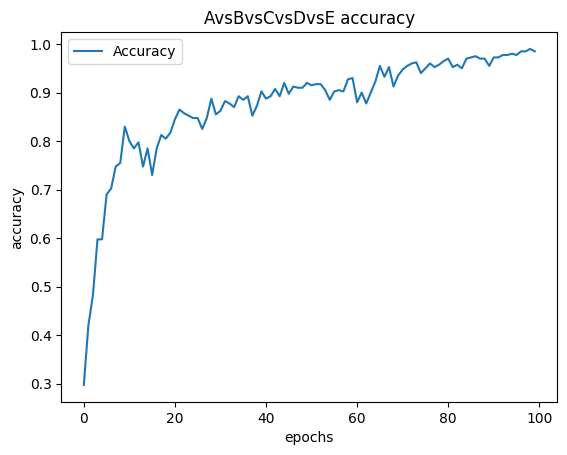

In [50]:
plt.plot(history.history['accuracy'])
plt.title('AvsBvsCvsDvsE accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Accuracy'],loc='best')
plt.savefig('22-AvsBvsCvsDvsE_Accuracy.png')
plt.show()

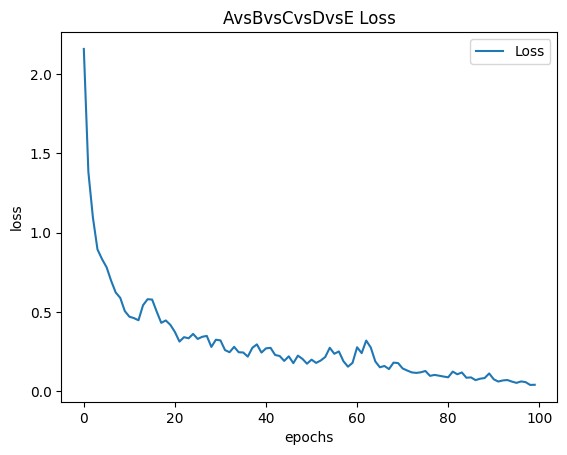

In [51]:
plt.plot(history.history['loss'])
plt.title('AvsBvsCvsDvsE Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Loss'],loc='best')
plt.savefig('22-AvsBvsCvsDvsE_Loss.png')
plt.show()

In [52]:
y_pred=model.predict(X_test).round()

4/4 [==============================] - 1s 41ms/step


In [53]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.00%


In [54]:
y_pred

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0.

In [55]:
y_pred=np.argmax(y_pred,axis=1)

In [56]:
y_pred

array([3, 0, 3, 1, 1, 3, 3, 1, 0, 4, 0, 1, 4, 0, 3, 3, 4, 0, 3, 4, 4, 4,
       2, 3, 0, 4, 4, 2, 1, 2, 4, 3, 4, 1, 0, 3, 4, 0, 2, 0, 3, 0, 4, 1,
       0, 0, 0, 3, 3, 0, 0, 1, 1, 4, 1, 0, 1, 0, 4, 0, 4, 2, 3, 3, 0, 0,
       4, 0, 3, 3, 3, 2, 3, 4, 3, 3, 2, 0, 4, 4, 0, 0, 4, 1, 3, 0, 1, 4,
       3, 3, 2, 4, 3, 3, 4, 3, 0, 0, 4, 0], dtype=int64)

In [57]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [58]:
actual=y_test
predicted=y_pred

In [59]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [60]:
confusion_matrix

array([[27,  0,  0,  1,  0],
       [ 1, 13,  0,  0,  0],
       [ 0,  0,  5,  3,  2],
       [ 0,  0,  3, 21,  0],
       [ 0,  0,  0,  2, 22]], dtype=int64)

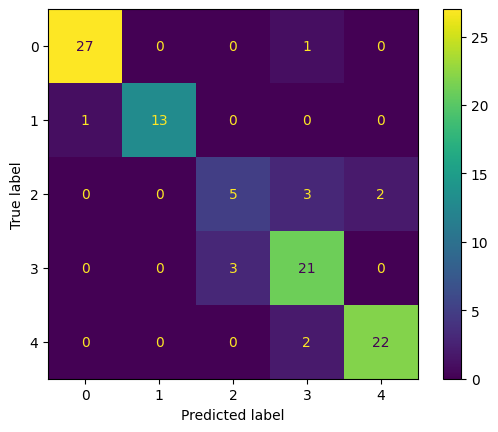

In [61]:
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)
plt.savefig('22-AvsBvsCvsDvsE_ConfusionMatrix.png')
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       1.00      0.93      0.96        14
           2       0.62      0.50      0.56        10
           3       0.78      0.88      0.82        24
           4       0.92      0.92      0.92        24

    accuracy                           0.88       100
   macro avg       0.86      0.84      0.84       100
weighted avg       0.88      0.88      0.88       100

